# Linear Regression Practical Implementation

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [55]:
df=fetch_california_housing()

In [56]:
dataset = pd.DataFrame(df.data)

In [57]:
dataset.columns=df.feature_names

In [61]:
## Independent feature and dependent features
X=dataset
y=df.target

In [62]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [17]:
## train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [20]:
## standerdizing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [21]:
scaler.fit_transform(X_train) # X_train ka data normalize ho gaya hai!

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [23]:
# Abb iss normalized data set ko X_train mein daal do
X_train = scaler.fit_transform(X_train)

In [24]:
X_test= scaler.transform(X_test) #search karo ki idhar fit kyu nahi kiya...

In [26]:
from sklearn.linear_model import LinearRegression

##Cross Validation-

from sklearn.model_selection import cross_val_score

In [39]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
mse=cross_val_score(regression , X_train , y_train, scoring = 'neg_mean_squared_error' , cv = 10)

In [41]:
np.mean(mse) #finding mean of all possible outputs of the crossvalidated data

-0.5257104326777

In [42]:
## prediction
reg_pred=regression.predict(X_test)

In [44]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

C:\Users\Arnav Mehta\AppData\Local\Temp\ipykernel_27544\838020795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_pred - y_test)


<Axes: ylabel='Density'>

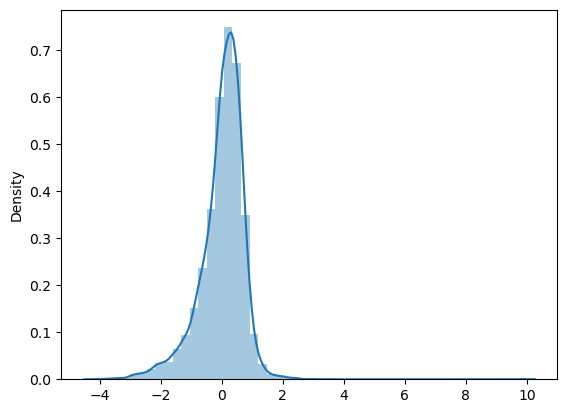

In [48]:
import seaborn as sns
sns.distplot(reg_pred - y_test)

## Observation:
1.Overall variance is quite less
2.There are some outliers too

In [51]:
from sklearn.metrics import r2_score

In [52]:
score=r2_score(reg_pred,y_test)

In [53]:
score

0.34513393809439596